### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [1]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_squared_error 

In [3]:
cali = pd.read_csv('data/housing.csv')

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

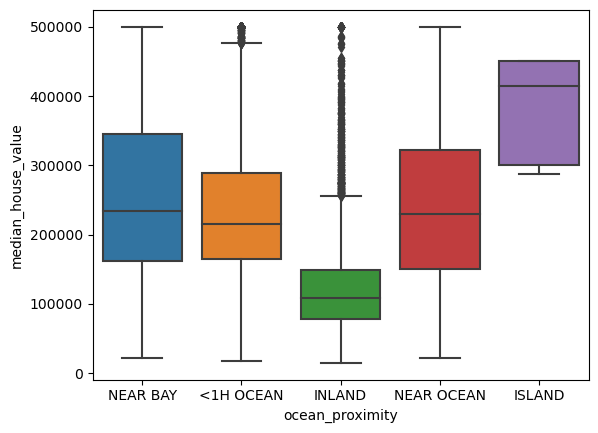

In [6]:
#plot a boxplot to see the impact of ocean proximity on house value
sn.boxplot(x='ocean_proximity',y='median_house_value', data=cali)

In [7]:
###Step-1.1: Clean dataset - replace null values in total_bedrooms with 0
cali['total_bedrooms'] = cali['total_bedrooms'].fillna(0)

In [8]:
###Step-1.2: Clean dataset - add dummy rows for ocean proximity object column
#create a transformer for the ocean proximity field
ordinal_transformer = make_column_transformer(
    (OrdinalEncoder(categories = [['INLAND','<1H OCEAN','NEAR BAY','NEAR OCEAN','ISLAND']]), ['ocean_proximity']),
                                          remainder='passthrough')
vars_categorical = cali.select_dtypes(include="object").columns.to_list()
vars_remainder = cali.select_dtypes(exclude="object").columns.to_list()

#build a second dataset after applying the ocean proximity transformation
ordinal_transformer.fit(cali)

cali_enc = ordinal_transformer.transform(cali)
cali_enc = pd.DataFrame(
    cali_enc, columns=vars_categorical+vars_remainder)

In [9]:
cali_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ocean_proximity     20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20640 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   median_house_value  20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [10]:
#describe the dataset
cali_enc.describe()

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.051841,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,0.971081,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,0.000000,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,1.000000,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,1.000000,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,4.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
#view some records
cali_enc.head()

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,2.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,2.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,2.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,2.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


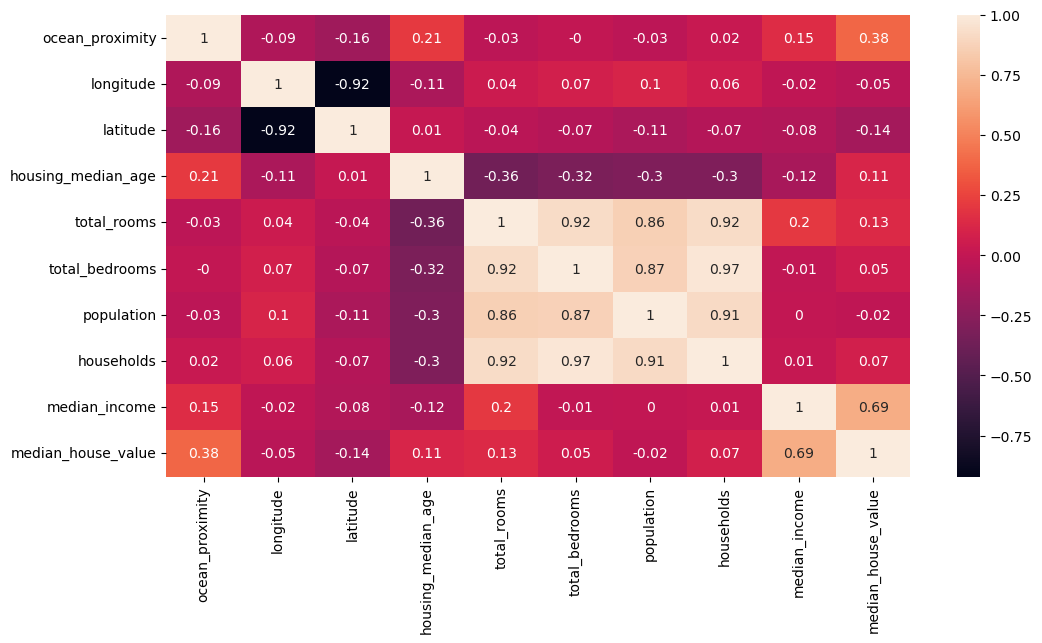

Top four cols that are most correlated with Media house value are:
 ['median_income', 'ocean_proximity', 'total_rooms', 'housing_median_age', 'households', 'total_bedrooms']
Ordered list of columns by correlation value to Media House price is:
0                     median_house_value
median_house_value                1.00
median_income                     0.69
ocean_proximity                   0.38
total_rooms                       0.13
housing_median_age                0.11
households                        0.07
total_bedrooms                    0.05
population                       -0.02
longitude                        -0.05
latitude                         -0.14


In [12]:
#Step-2: Check correlation of fields to house value
highest_corr = ''

# build heatmap
corr_matrix = round(cali_enc.corr(),2)
fig = plt.figure(figsize=(12, 6))
sn.heatmap(corr_matrix, annot=True)
plt.show()

#get the top four columns that show the most correlation
top4cols = corr_matrix[['median_house_value']].nlargest(n=8,columns="median_house_value").index[1:7]
print("Top four cols that are most correlated with Media house value are:\n",list(top4cols))

#return the ordered list of columns based on correlation value
orderedcols = corr_matrix[['median_house_value']].nlargest(n=len(corr_matrix), columns="median_house_value")
print(f'Ordered list of columns by correlation value to Media House price is:\n{0}',orderedcols)


In [13]:
#Step-3: create train and test datasets
X =  cali_enc.drop('median_house_value', axis = 1)
y = cali_enc['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22, shuffle= True)

print(X_train.shape, X_test.shape)

train_reg_model = LinearRegression()
train_reg_model.fit(X_train,y_train)

model_reg_train_mse = mean_squared_error(train_reg_model.predict(X_train),y_train)
model_reg_test_mse = mean_squared_error(train_reg_model.predict(X_test), y_test)

#MSE values for training and test data sets
print(model_reg_train_mse,model_reg_test_mse )



(16512, 9) (4128, 9)
4867756280.745225 4634364911.636304


Text(0.5, 1.0, 'Permutation Importance')

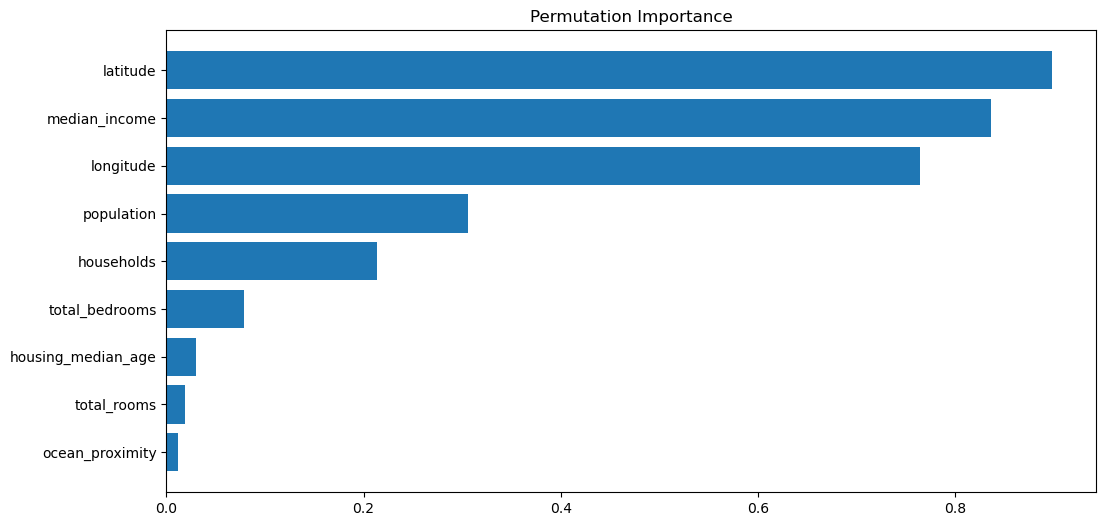

In [15]:
#Step-4.1: compute the permutation importance and compare the results with corr_matrix value
# what is returned in the correlation matrix



perm_importance = permutation_importance(train_reg_model, X_test, y_test,n_repeats=30,random_state=0)
#print(perm_importance.importances_mean[sorted_idx-1],np.array(X_test.columns)[sorted_idx-1] )

sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')




In [16]:
sorted_idx = perm_importance.importances_mean.argsort()

ser1 = pd.Series(perm_importance.importances_mean[sorted_idx])
ser2 = pd.Series(X_test.columns[sorted_idx])
perm_ds = pd.concat([ser1,ser2], axis=1)
print(perm_ds)


          0                   1
0  0.011410     ocean_proximity
1  0.018895         total_rooms
2  0.030336  housing_median_age
3  0.078300      total_bedrooms
4  0.213798          households
5  0.306351          population
6  0.764117           longitude
7  0.836137       median_income
8  0.898403            latitude


In [17]:
#Step-4.2: Get the coeffecients of the chosen parameters and plot importance by coeef



sorted_coeff = train_reg_model.coef_.argsort()

coef_dict = {}
#print coeffecient & feature values
for coef, feat in zip(train_reg_model.coef_,train_reg_model.feature_names_in_):
    coef_dict[feat] = coef
coef_df = pd.DataFrame.from_dict(coef_dict,orient='index', columns=['values'])
print (coef_df.sort_values('values', ascending=False))
print (train_reg_model.intercept_)



                          values
median_income       38923.091295
ocean_proximity      9266.233644
housing_median_age   1074.520824
households             95.794170
total_bedrooms         53.214145
total_rooms            -4.802154
population            -38.511532
longitude          -35630.373400
latitude           -35723.399549
-2980368.883909644


Text(0.5, 1.0, 'Coeff Importance')

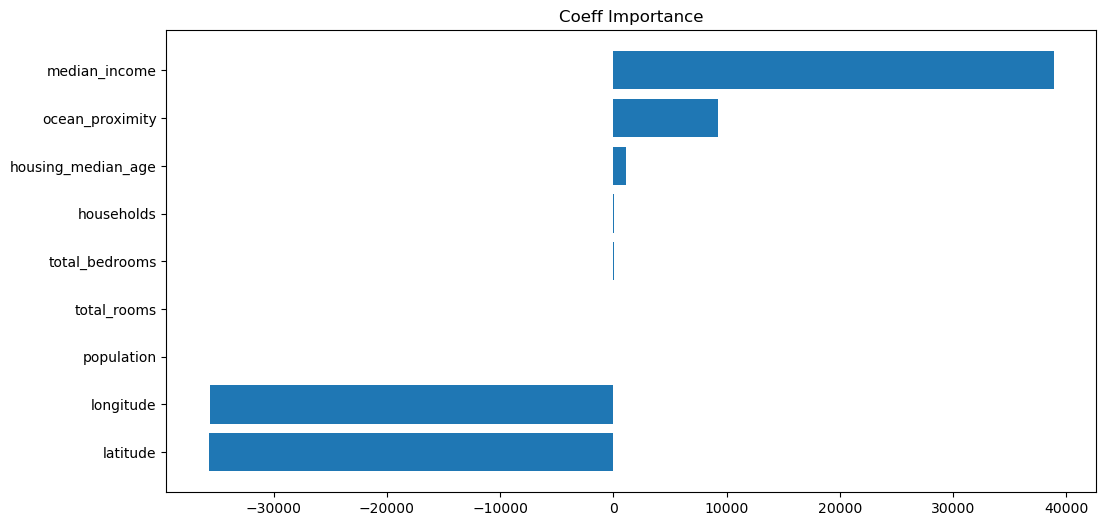

In [18]:
sorted_idx = train_reg_model.coef_.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), train_reg_model.coef_[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), train_reg_model.feature_names_in_[sorted_idx])
plt.title('Coeff Importance')

In [19]:
#Use the top 6 correlated features to determine the MSE
X1 = X_train[top4cols]
X2 = X_test[top4cols]

train_top4_model = LinearRegression()
train_top4_model.fit(X1,y_train)

top4_train_mse = mean_squared_error(train_top4_model.predict(X1),y_train)
top4_test_mse = mean_squared_error(train_top4_model.predict(X2), y_test)

#MSE values for training and test data sets
print(top4_train_mse,top4_test_mse )

5516011636.13294 5247321587.7625885


In [20]:
#Use the top 6 permutation importance features to determine the MSE
X1_perm = X_train[['latitude','longitude','median_income','population','households','total_bedrooms']]
X2_perm = X_test[['latitude','longitude','median_income','population','households','total_bedrooms']]

train_perm_model = LinearRegression()
train_perm_model.fit(X1_perm,y_train)

perm_train_mse = mean_squared_error(train_perm_model.predict(X1_perm),y_train)
perm_test_mse = mean_squared_error(train_perm_model.predict(X2_perm), y_test)

#MSE values for training and test data sets
print(perm_train_mse,perm_test_mse )

5083440866.651102 4905021817.987831


In [28]:
#Step-5: Createa. simple cross-validation function
def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None #placeholder for best model
    best_mse = np.inf #set best mse to infinity to begin
    
    train_mses = []
    test_mses = []

    #for complexity 1 - 10:
    for i in range (1,5):
        #create pipeline with PolynomialFeatures and LinearRegression
        #remember to set include_bias = False
        pipe = Pipeline([
        ('quad_features' , PolynomialFeatures(degree=i, include_bias=False)),
        ('quad_model' , LinearRegression())
        ])
        #fit pipeline on training data
        pipe.fit(X_train,y_train)
        #mse of training data
        mse_train = float(mean_squared_error(y_train,pipe.predict(X_train)))
        #mse of testing data
        mse_test = float(mean_squared_error(y_test,pipe.predict(X_test)))
        
        train_mses.append(mse_train)
        test_mses.append(mse_test)
        
        #if mse is best -- set best_pipe = pipe
        if mse_test < best_mse:
            best_mse =   mse_test
            best_pipe = pipe
    #return best pipeline   
    return best_pipe, best_mse, train_mses, test_mses





In [29]:
#Step-5: use cross-validation to find the hyperparameter model that has the least variance

train_mses = ''
test_mses = ''
best_mse = 0
#X1 = X_train[top4cols]
#X2 = X_test[top4cols]
X1=X_train
X2=X_test

best_model, best_mse, mse_train, mse_test = simple_cross_validation(X1, y_train, X2, y_test)

print(best_mse, mse_train, mse_test)
print(best_model.get_params() )


#print(train_reg_model.coef_)

3928820940.037417 [4867756280.745223, 4036843199.616858, 3339155822.8438916, 3190140677.162138] [4634364911.636317, 3928820940.037417, 4217461605.1912947, 32354390381.838177]
{'memory': None, 'steps': [('quad_features', PolynomialFeatures(include_bias=False)), ('quad_model', LinearRegression())], 'verbose': False, 'quad_features': PolynomialFeatures(include_bias=False), 'quad_model': LinearRegression(), 'quad_features__degree': 2, 'quad_features__include_bias': False, 'quad_features__interaction_only': False, 'quad_features__order': 'C', 'quad_model__copy_X': True, 'quad_model__fit_intercept': True, 'quad_model__n_jobs': None, 'quad_model__positive': False}


4
4


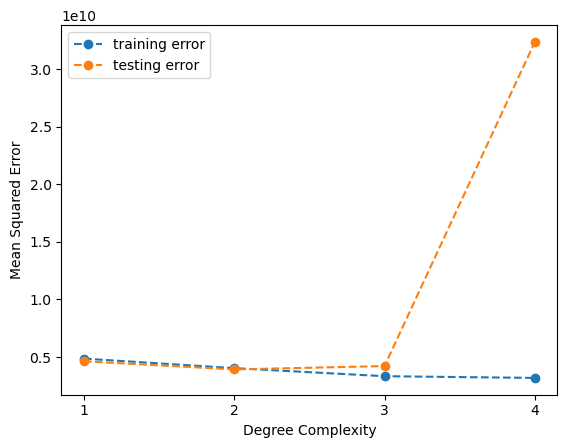

In [34]:
print(len(mse_train))
print(len(mse_test))

plt.plot(range(1, 5), mse_train, '--o', label = 'training error')
plt.plot(range(1, 5), mse_test, '--o', label = 'testing error')
plt.xticks(range(1, 5), range(1, 5))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();



In [ ]:
#Step-5 use cross-validation to find errors in model

In [ ]:
#Step-6 Use the recommended method to find errors in model